In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
from datetime import datetime
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['qtum_price.csv', 'stratis_price.csv', 'bitcoin_cash_price.csv', 'waves_price.csv', 'bitconnect_price.csv', 'ethereum_dataset.csv', 'iota_price.csv', 'ripple_price.csv', 'monero_price.csv', 'litecoin_price.csv', 'nem_price.csv', 'bitcoin_price.csv', 'neo_price.csv', 'omisego_price.csv', 'dash_price.csv', 'numeraire_price.csv', 'bitcoin_dataset.csv', 'ethereum_price.csv', 'ethereum_classic_price.csv']


- Preprocessing bitcoin_price.csv to get the date in right format

In [4]:
bit_price_df = pd.read_csv('../input/bitcoin_price.csv')
for i, row in bit_price_df.iterrows():
    dt = datetime.strptime(row['Date'], '%b %d, %Y')        
    dt = dt.strftime('%Y-%m-%d')
    row['Date'] = dt
    bit_price_df.set_value(i,'Date',dt)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [6]:
bit_price_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000"
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000"
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000"
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000"
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000"


- Preprocessing bitcoin_dataset.csv to get the date in right format

In [7]:
bitcoin_dataset_df = pd.read_csv('../input/bitcoin_dataset.csv')

for i, row in bitcoin_dataset_df.iterrows():
    dt = datetime.strptime(row['Date'], '%Y-%m-%d 00:00:00')        
    dt = dt.strftime('%Y-%m-%d')
    row['Date'] = dt
    bitcoin_dataset_df.set_value(i,'Date',dt)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [8]:
bitcoin_dataset_df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,0.000032,2.527738,0.0,0.0,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0
1,2010-02-24,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,0.000036,3.781179,0.0,0.0,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0
2,2010-02-25,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,0.000028,3.781179,0.0,0.0,1057.142857,0.0,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0
3,2010-02-26,0.0,2136100.0,0.0,0.0,0.0,0.000319,0.0,1.0,0.0,0.000032,3.781179,0.0,0.0,64.582059,0.0,176.0,176.0,43135.0,176.0,176.0,29349.0,13162.0,0.0
4,2010-02-27,0.0,2144750.0,0.0,0.0,0.0,0.000223,0.0,1.0,0.0,0.000033,3.781179,0.0,0.0,1922.222222,0.0,176.0,176.0,43311.0,176.0,176.0,9101.0,450.0,0.0


- Joining the two dfs on 'Date' column


In [13]:
joined_data = bitcoin_dataset_df.merge(bit_price_df, on='Date')

In [14]:
joined_data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.98999,11090225.0,1.508160e+09,4.992244e+06,7186.0,0.126539,0.0,379.0,7.950000,74.501151,8.974296e+06,572109.88793,32.570424,2.530894,13.958666,107554.0,40986.0,16891249.0,22796.0,22880.0,6.173546e+05,166226.0,22605050.0,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,141.50002,11094750.0,1.569907e+09,1.288606e+07,7211.0,0.140126,0.0,313.0,6.350000,80.746756,8.974296e+06,645240.09120,35.830093,1.566140,12.902479,73687.0,50009.0,16941258.0,27314.0,24458.0,8.977292e+05,291162.0,41199388.0,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,139.10900,11098475.0,1.543898e+09,1.152067e+07,7238.0,0.185539,0.0,320.0,7.766667,74.633390,1.007629e+07,525692.91100,54.593614,1.627793,10.773500,60887.0,48795.0,16990053.0,25564.0,23909.0,1.785923e+06,232155.0,32294820.0,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,124.29980,11102000.0,1.379976e+09,2.723124e+07,7261.0,0.167730,0.0,314.0,8.000000,70.626228,1.007629e+07,442507.28800,35.903448,1.341389,8.773466,61672.0,50437.0,17040490.0,24530.0,25191.0,1.233492e+06,265397.0,32988744.0,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,105.00003,11105600.0,1.166088e+09,3.068792e+07,7288.0,0.189949,0.0,336.0,7.866667,72.128914,1.007629e+07,383775.10965,55.084329,1.162286,6.700218,67744.0,57278.0,17097768.0,27688.0,26396.0,1.127675e+06,314467.0,33019004.0,116.38,125.60,92.28,105.21,-,"1,292,190,000"


### Let Data tell the story
- Date vs price
- day of week analysis
- seasonal trend in price
- check bitcoin price vs block size
- check price correlation with all other variables in that dataset and see which one are correlated
- try to find out the if you can see any relations


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


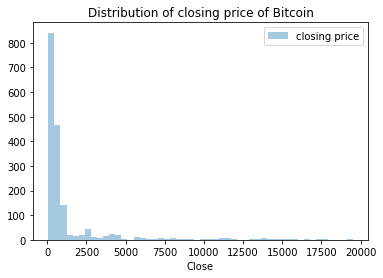

In [15]:
sns.distplot(joined_data['Close'], kde=False, label='closing price') #default bins using Freedman-Diaconis rule.
#sns.distplot(joined_data['Open'], kde=False, label='Open price') #default bins using Freedman-Diaconis rule.
#sns.distplot(joined_data['High'], kde=False, label='High price') #default bins using Freedman-Diaconis rule.
plt.title("Distribution of closing price of Bitcoin")
plt.legend(loc='best')
plt.show()

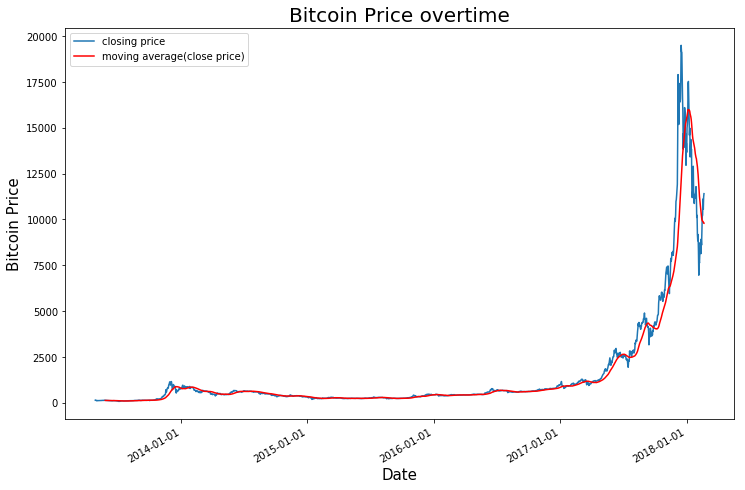

In [16]:
import datetime

fig, ax = plt.subplots(figsize=(12,8))
x3 = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in joined_data.Date]

#joined_data
joined_data['moving_avg'] =  joined_data['Close'].rolling(window=30).mean()
#print(joined_data)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.plot(x3, joined_data.Close, label='closing price')
plt.plot(x3, joined_data.moving_avg, color='red', label='moving average(close price)')
plt.gcf().autofmt_xdate()
plt.xlabel("Date", fontsize=15)
plt.ylabel("Bitcoin Price", fontsize=15)
plt.title("Bitcoin Price overtime", fontsize=20)
plt.legend(loc='best')
plt.show()

The plot shows a huge surge in price of bitcoin in 2017 

The price is increased from 1000 to 3000 dollar from earlier 2017 till July 2017 
and then from 3000 to 7000 dollars from July to November.

## Day of week analysis


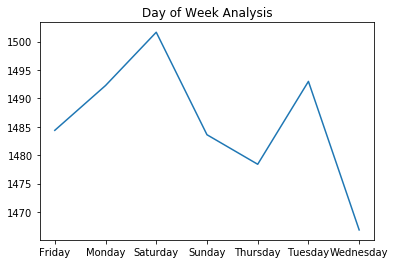

In [31]:
joined_data['weekday'] = pd.to_datetime(joined_data['Date']).dt.weekday_name
week_data = joined_data.groupby(['weekday'], as_index=False)['Close'].agg({'mean': 'mean'})
day_of_week = pd.DataFrame(data=week_data)


plt.plot(figsize=(12,8))
plt.title('Day of Week Analysis')

my_xticks = np.array(day_of_week.weekday)
plt.xticks(range(len(week_data['mean'])), my_xticks)
plt.plot(range(len(week_data['mean'])), week_data['mean'])



- The plot shows that Saturday and Tuesday see the high bitcoin price while Wednesday has the lowest price. 

- But just looking at the average might be misleading. Let's look at spread of data per year.

In [34]:
joined_data['year'] = pd.to_datetime(joined_data['Date']).dt.year
joined_data['month'] = pd.to_datetime(joined_data['Date']).dt.month
joined_data['weekday'] = pd.to_datetime(joined_data['Date']).dt.weekday_name

#print(joined_data.weekday)

#week_data=joined_data.groupby(['weekday'])['Close'].mean()

mean_df = joined_data.groupby(['year','weekday'], as_index=False)['Close'].agg({'mean': 'mean'})
std_df = joined_data.groupby(['year','weekday'], as_index=False)['Close'].agg({'std': np.std})
min_df = joined_data.groupby(['year','weekday'], as_index=False)['Close'].agg({'min': np.min})
max_df = joined_data.groupby(['year','weekday'], as_index=False)['Close'].agg({'max': np.max})
median_df = joined_data.groupby(['year','weekday'], as_index=False)['Close'].agg({'median': np.median})



week_data = pd.concat([mean_df, std_df['std'], min_df['min'],max_df['max'], median_df['median']], axis=1)
week_data['var_coeff'] = std_df['std'] / mean_df['mean']

week_data.head(10)

,year,weekday,mean,std,min,max,median,var_coeff
0,2013,Friday,257.139143,280.848792,68.43,1131.97,129.000,1.092206
1,2013,Monday,261.538056,275.899594,76.52,1043.33,127.025,1.054912
2,2013,Saturday,254.231429,272.544318,70.28,1129.43,128.550,1.072032
3,2013,Sunday,251.256389,260.742913,74.56,955.85,129.060,1.037756
4,2013,Thursday,260.195429,287.506580,80.53,1045.11,126.430,1.104964
5,2013,Tuesday,266.576667,286.679512,76.69,1078.28,126.875,1.075411
6,2013,Wednesday,251.185714,278.571893,77.53,1151.17,123.890,1.109028
7,2014,Friday,524.868846,145.159065,317.84,868.48,502.765,0.276563
8,2014,Monday,526.644038,153.177382,312.67,953.29,485.570,0.290856
9,2014,Saturday,526.892115,152.733838,315.86,913.95,502.905,0.289877


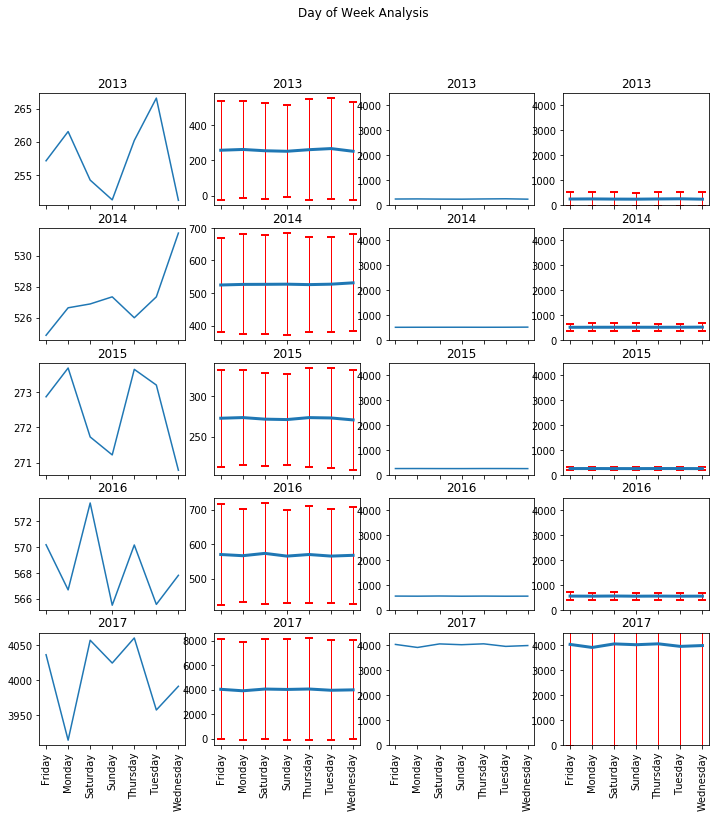

In [36]:
years = [2013,2014,2015,2016,2017]


fig, ax = plt.subplots(len(years),4,sharex=True, sharey=False ,figsize=(12,12))
fig.suptitle('Day of Week Analysis')

for i, year in enumerate(years):
    holder = week_data[week_data['year']==year]
    #print(holder)
    
    my_xticks = np.array(day_of_week.weekday)
    plt.xticks(range(len(holder['mean'])), my_xticks, rotation=90)
    
    ax[i][0].plot(range(len(holder['mean'])), holder['mean'])
   # ax[i][0].set_ylim(min(holder['mean']), max(holder['mean']))
    

    ax[i][1].errorbar(
    range(len(holder['mean'])),     # X
    holder['mean'],    # Y
    yerr=holder['std'],        # Y-errors
      # format line like for plot()
    linewidth=3,   # width of plot line
    elinewidth=1,# width of error bar line
    ecolor='r',    # color of error bar
    capsize=4,     # cap length for error bar
    capthick=2,  # cap thickness for error bar
    )
    

    ax[i][2].plot(range(len(holder['mean'])), holder['mean'])
    #ax[i][2].set_ylim(abs(max(holder['mean']) - max(holder['std'])), abs(max(holder['mean']) + max(holder['std'])))
    
    ax[i][3].errorbar(
    range(len(holder['mean'])),     # X
    holder['mean'],    # Y
    yerr=holder['std'],        # Y-errors
      # format line like for plot()
    linewidth=3,   # width of plot line
    elinewidth=1,# width of error bar line
    ecolor='r',    # color of error bar
    capsize=4,     # cap length for error bar
    capthick=2,  # cap thickness for error bar
    )
    
    
    ax[i][2].set_ylim(0, 4500) #these values are set by experimenting with 'sharey' attribute in subplots() function
                               #the goal is to compare the mean for all years relative to bitcoin increased price now
    ax[i][3].set_ylim(0, 4500)

    #ax[i].set_xlabel("Year"+" "+str(year),fontsize=10)
    #ax[i].set_ylabel("Bitcoin Price",fontsize=10)
    ax[i][0].set_title(year)
    ax[i][1].set_title(year)
    ax[i][2].set_title(year)   
    ax[i][3].set_title(year)  

for tick in ax[i][0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[i][1].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[i][2].get_xticklabels():
    tick.set_rotation(90)


#plt.savefig('yearly_dayofweek.png')
plt.show()


The price trend for weekdays is not very clear as it was not in 5 years data plot. 
But we can still see that:
- In three of five years, Wednesdays see price drops and Mondays see price surge.
- The trend is alternating years is comparable as well. Forexample year 2013, 2015 and 2017 somehow follow the similar trend.

If we look at the mean for day-of-week individually, it seems mean is fluctuating and there is no visible pattern as we saw before. 

may be price is not a good indicator. How about **difference** in price?

## See spread over the years to see consistency 

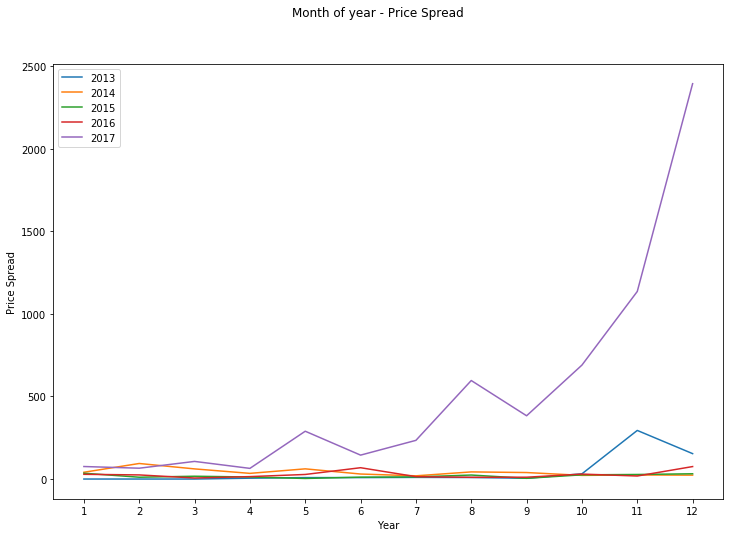

In [39]:

years = [2013,2014,2015,2016,2017]

fig,ax = plt.subplots(figsize=(12, 8))  #plt.subplots(figsize=(12,8))
fig.suptitle('Month of year - Price Spread')
#fig.subplots_adjust(hspace=.5,wspace=0.7)


for i, year in enumerate(years):
    holder = year_month_data[year_month_data['year']==year]
    #print(holder)
    ax.plot(range(len(holder['std'])), holder['std'], label=str(year))
    ax.set_xlabel("Year",fontsize=10)
    ax.set_ylabel("Price Spread",fontsize=10)
    #ax[i].title("Month of year Price"+" "+str(year), fontsize=10)
    
    
my_xticks = np.array(holder.month)
plt.xticks(range(len(holder['std'])), my_xticks)#Set label location
plt.legend(loc='best')
#plt.savefig('btc_stability.png')
plt.show()

- This shows the point that BTC price is volatile rather the most unstable in 2017.

# BTC price correlation with some other variables

I chose these variables based on my understanding of bitcoin. To me, these variables might affect the bitcoin price.
- Close: closing price of bitcoin
- btc_market_cap: bitcoin market capitilization for the particular date. Market cap = Total bitcoin volume * price.
- btc_n_transactions_per_block: How many transactions took place per block on a particular date
- abs_btc_count: bitcoin count till date
- btc_hash_rate: Hash rate applied to mine the bitcoins per date
- btc_difficulty: measure of difficulty to mine. The more difficult, the less coins should be mined.
- btc_cost_per_transaction: avg cost of transaction
- btc_n_transactions:

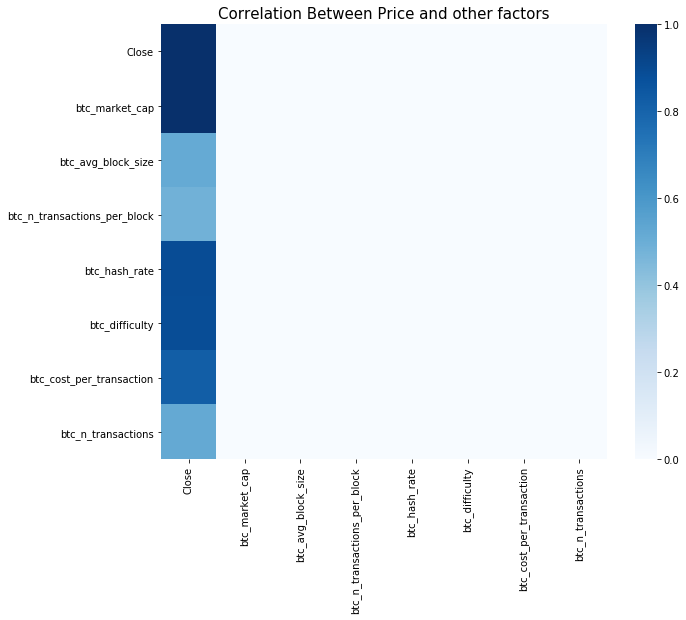

In [41]:
selected_col = joined_data[['Close','btc_market_cap',
                            'btc_avg_block_size',
                            'btc_n_transactions_per_block',
                            'btc_hash_rate',
                            'btc_difficulty',
                            'btc_cost_per_transaction',
                            'btc_n_transactions']]

selected_col.head()
corrmat = selected_col.corr(method='pearson')

columns = ['Close']
my_corrmat = corrmat.copy()
mask = my_corrmat.columns.isin(columns)
my_corrmat.loc[:, ~mask] = 0
#print(my_corrmat)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(my_corrmat, annot=False, fmt="f", cmap="Blues") #vmax=1., square=True)
plt.title("Correlation Between Price and other factors", fontsize=15)
#plt.savefig('variablecorrelation.png', bbox_inches='tight')
plt.show()

Since, We are concerned with the relationship between bitcoin and other variables, I have made other values 0 for the sake of clarity.

The map shows that BTC price is most correlated with BTC market capitilization, BTC hash rate and BTC_difficulty
